**Contexto do Projeto**

A empresa chinesa de automóveis Geely Auto deseja entrar no mercado dos Estados Unidos estabelecendo uma unidade de fabricação lá e produzindo carros localmente para competir com seus concorrentes dos EUA e da Europa.

Eles contrataram uma empresa de consultoria automotiva para entender os fatores que influenciam a precificação de carros. Especificamente, eles querem compreender os fatores que afetam a precificação de carros no mercado americano, já que esses podem ser muito diferentes do mercado chinês. A empresa deseja saber:

Quais variáveis são significativas para prever o preço de um carro.
Como essas variáveis descrevem o preço de um carro.
Com base em várias pesquisas de mercado, a empresa de consultoria coletou um grande conjunto de dados de diferentes tipos de carros no mercado americano.

**Objetivo de Negócios**

Nós devemos modelar o preço dos carros com as variáveis independentes disponíveis. Isso será usado pela administração para entender como exatamente os preços variam com as variáveis independentes. Eles podem, consequentemente, adaptar o design dos carros, a estratégia de negócios, etc. para atender a certos níveis de preço. Além disso, o modelo será uma boa maneira para a administração entender a dinâmica de precificação de um novo mercado.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Imporando bilbiotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [6]:
# Criando o caminho do Arquivo e carregando o dataframe pré-processado.
data_path = "/content/drive/MyDrive/Code/Myrep/Car_sales/Datasets/dbr.csv"
db = pd.read_csv(data_path)
db.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,1,1,1,1,1,88.6,168.8,64.1,48.8,...,130,1,1,1,1,111,5000,21,27,1
1,1,1,1,1,1,1,88.6,168.8,64.1,48.8,...,130,1,1,1,1,111,5000,21,27,2
2,1,1,1,2,1,1,94.5,171.2,65.5,52.4,...,152,1,2,2,1,154,5000,19,26,2
3,1,1,2,3,2,1,99.8,176.6,66.2,54.3,...,109,1,3,3,2,102,5500,24,30,3
4,1,1,2,3,3,1,99.4,176.6,66.4,54.3,...,136,1,3,3,3,115,5500,18,22,4


In [7]:
# Verificando medidas centrais.
db.describe().round(3)

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,...,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000
mean,1.098,1.180,1.561,2.800,1.673,1.015,98.757,174.049,65.908,53.725,...,126.907,2.478,15.059,15.683,11.771,104.117,5125.122,25.220,30.751,91.912
std,0.297,0.386,0.497,0.837,0.556,0.120,6.022,12.337,2.145,2.444,...,41.643,2.184,9.752,10.371,10.057,39.544,476.986,6.542,6.886,54.861
min,1.000,1.000,1.000,1.000,1.000,1.000,86.600,141.100,60.300,47.800,...,61.000,1.000,1.000,1.000,1.000,48.000,4150.000,13.000,16.000,1.000
25%,1.000,1.000,1.000,2.000,1.000,1.000,94.500,166.300,64.100,52.000,...,97.000,1.000,7.000,7.000,3.000,70.000,4800.000,19.000,25.000,43.000
50%,1.000,1.000,2.000,3.000,2.000,1.000,97.000,173.200,65.500,54.100,...,120.000,2.000,14.000,13.000,10.000,95.000,5200.000,24.000,30.000,91.000
75%,1.000,1.000,2.000,3.000,2.000,1.000,102.400,183.100,66.900,55.500,...,141.000,2.000,23.000,25.000,21.000,116.000,5500.000,30.000,34.000,139.000
max,2.000,2.000,2.000,5.000,3.000,2.000,120.900,208.100,72.300,59.800,...,326.000,8.000,36.000,37.000,32.000,288.000,6600.000,49.000,54.000,189.000


#### A seguir, realizo uma série de visualizações para compreender a distribuição da variável de interesse e a matriz de correlação entre as variáveis. Esta etapa é de grande importância, uma vez que o modelo preditivo será construído com as variáveis de maior impacto.

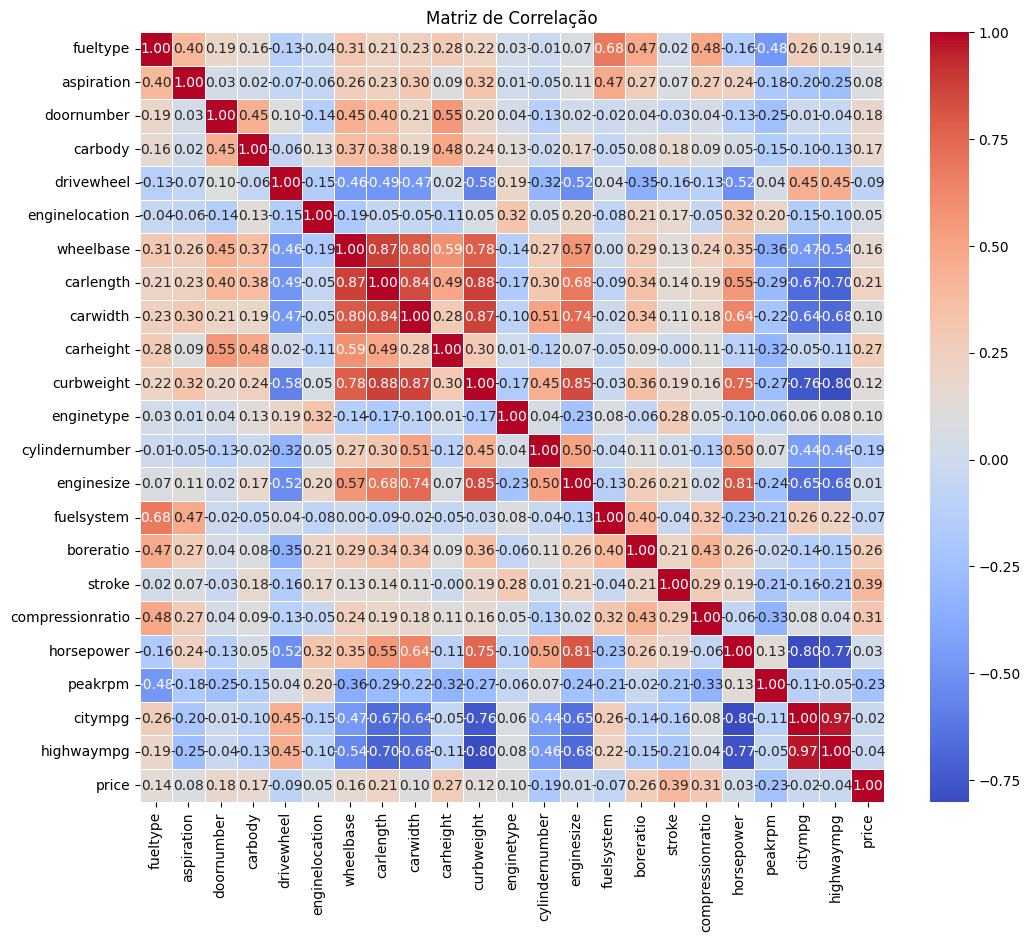

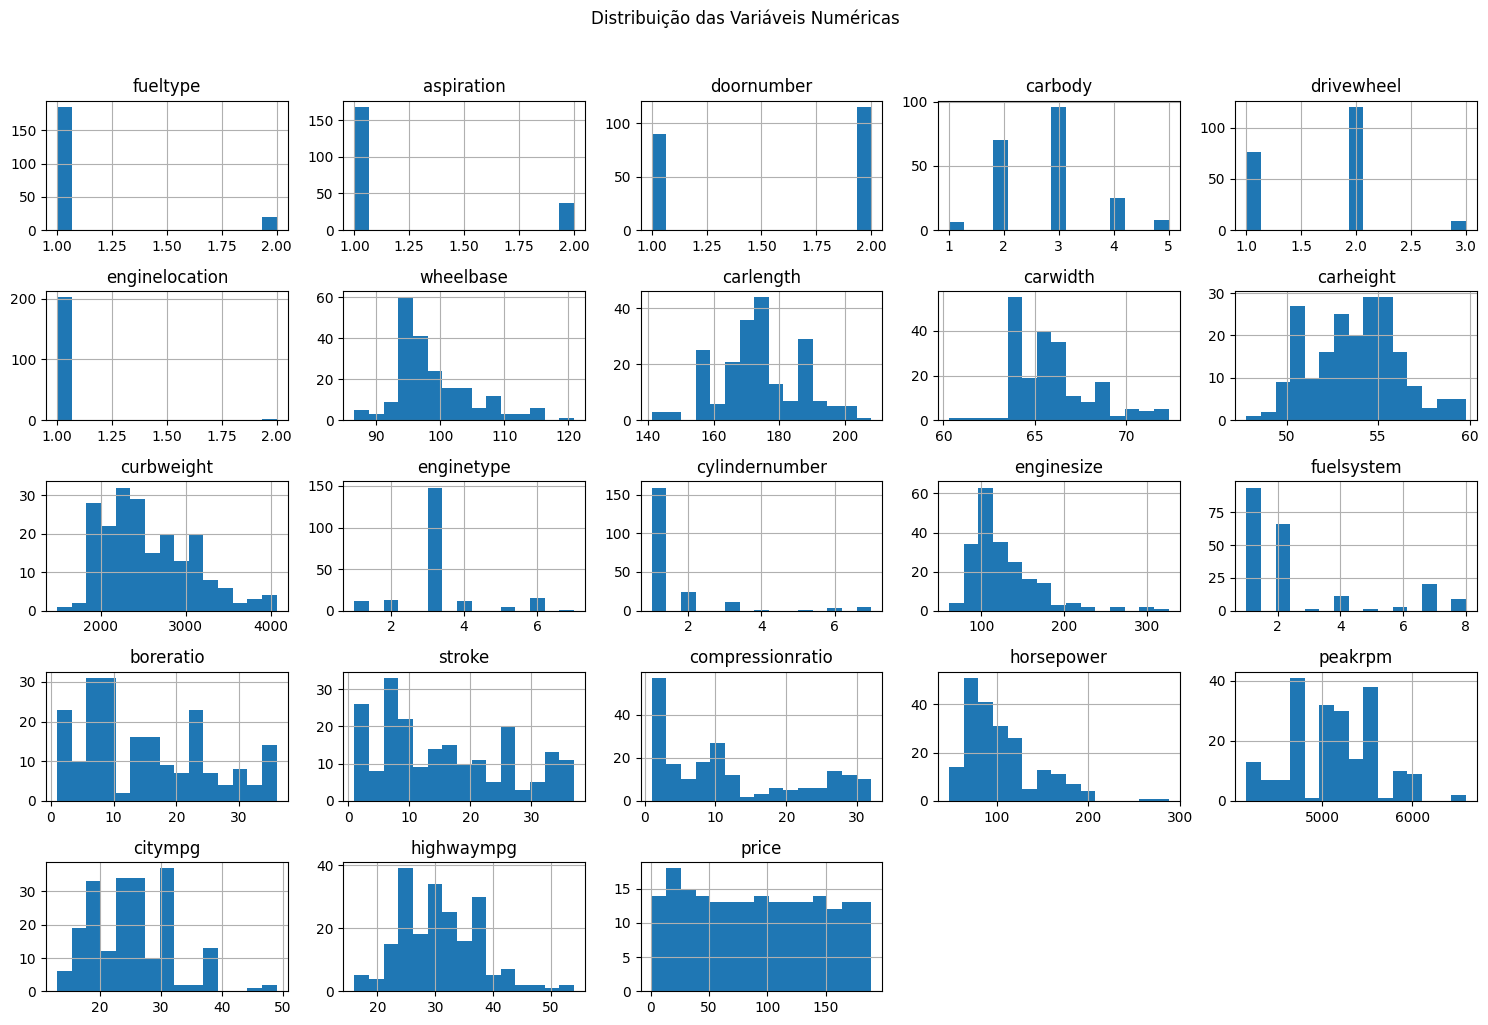

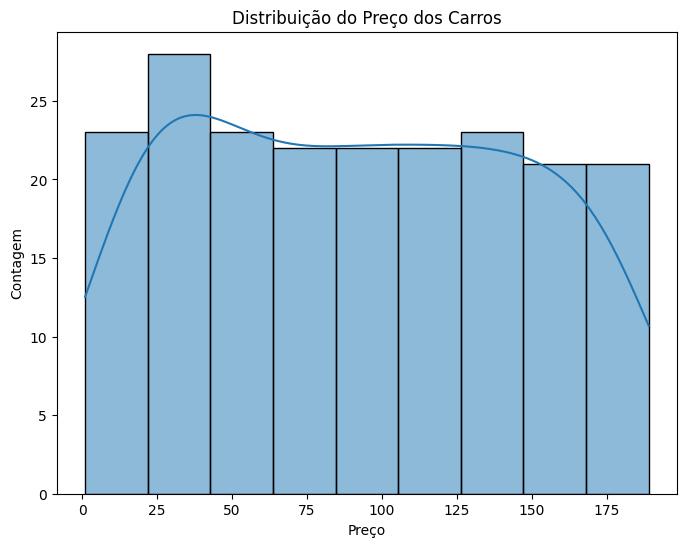

In [8]:
# Matriz de Correlação em forma de mapa de calor.
correlation_matrix = db.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

# Distribuição das Variáveis
numeric_columns = db.select_dtypes(include=['float64', 'int64']).columns
db[numeric_columns].hist(bins=15, figsize=(15, 10))
plt.suptitle('Distribuição das Variáveis Numéricas', y=1.02)
plt.tight_layout()
plt.show()

# Distribuição da Variável Alvo (Price)
plt.figure(figsize=(8, 6))
sns.histplot(data=db, x='price', kde=True)
plt.title('Distribuição do Preço dos Carros')
plt.xlabel('Preço')
plt.ylabel('Contagem')
plt.show()


A matriz de correlação demonstrou uma correlação mais forte entre as seguintes variáveis: ['drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'fuelsystem', 'boreratio', 'horsepower', 'citympg', 'highwaympg'], e a variável alvo, que é o preço. A distribuição das demais variáveis indica a presença de assimetria, o que era esperado ao comparar preço e quantidade produzida.

A partir deste ponto, realizo uma análise do comportamento do preço em relação a cada variável categórica.



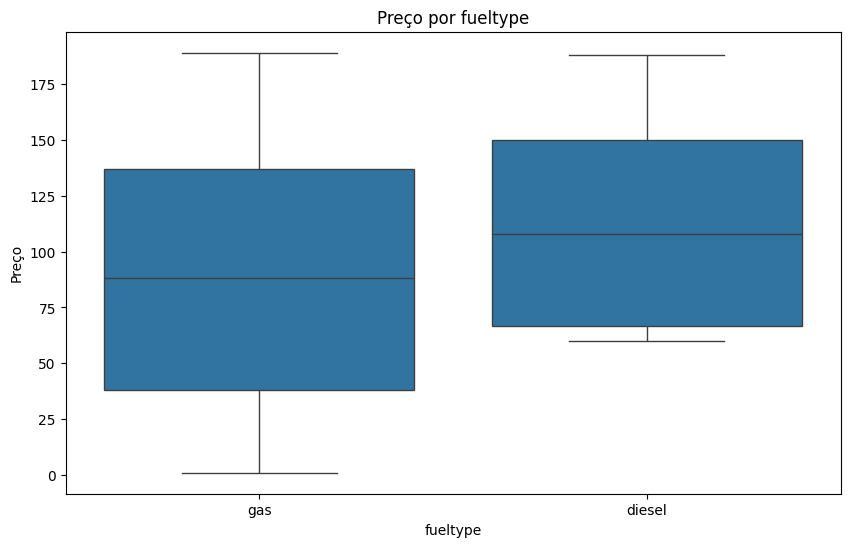

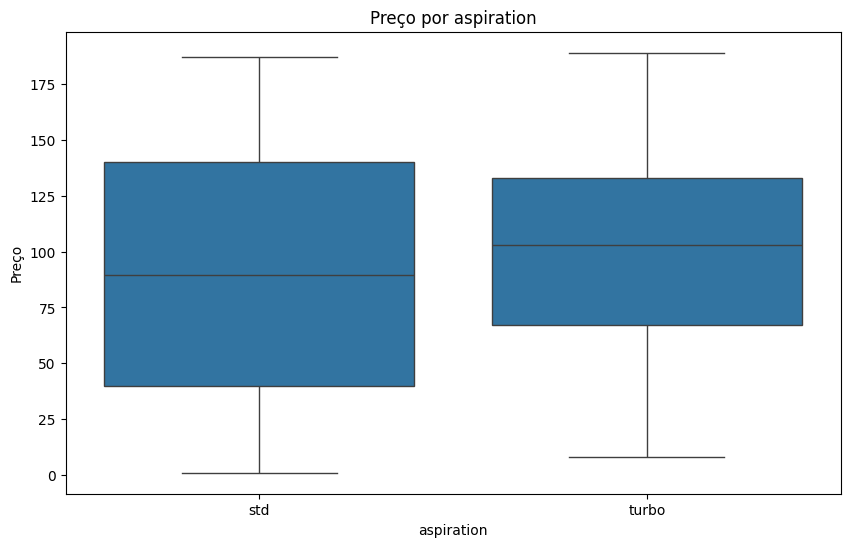

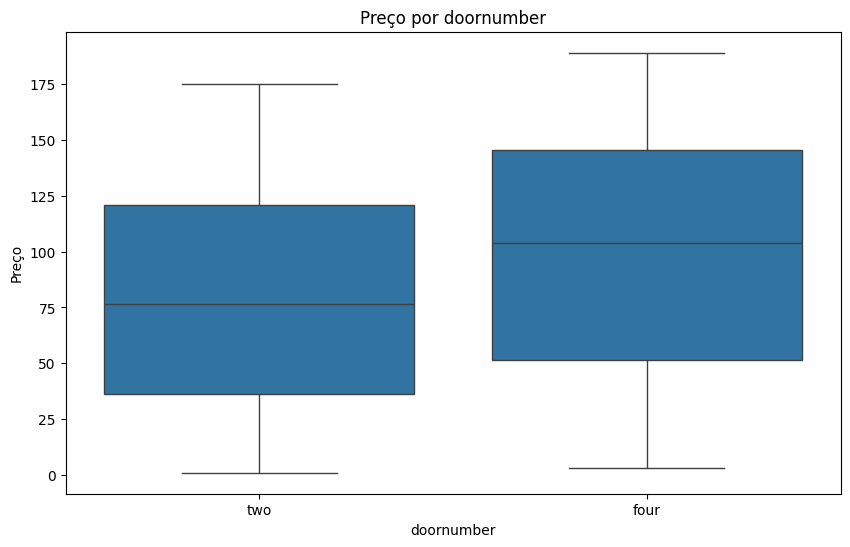

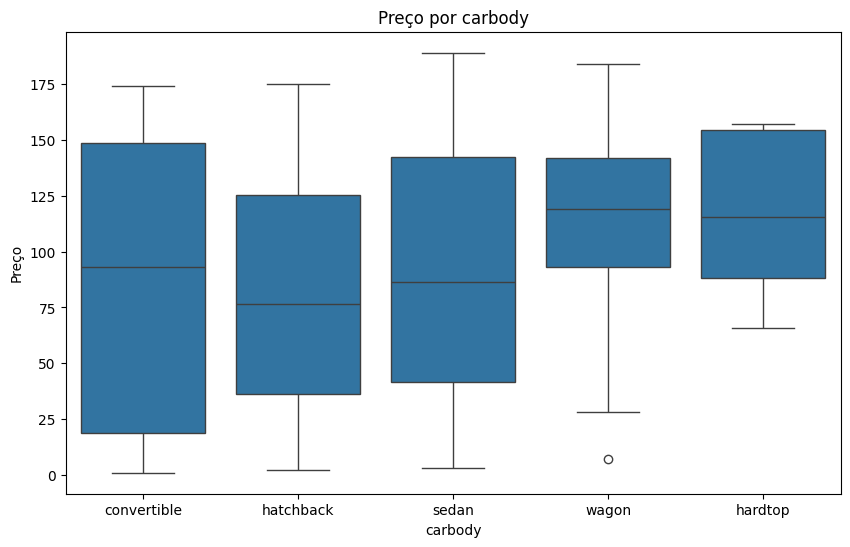

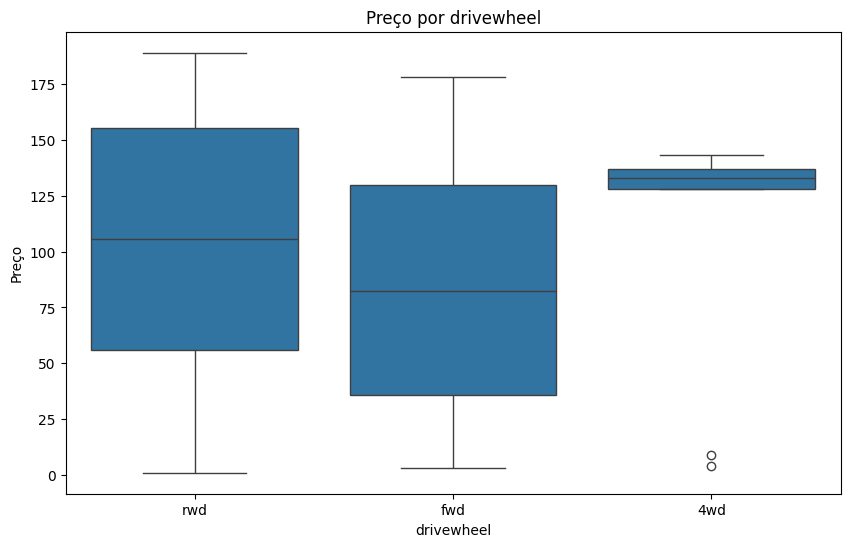

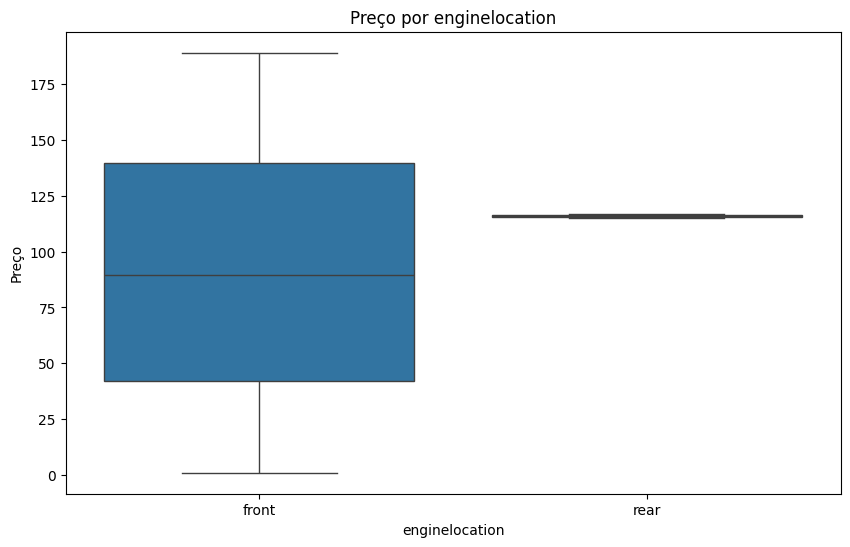

In [9]:
# Criando uma função para armazenar as variáveis categóricas.
variaveis_categoricas = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation']

# Fazendo uma iteração na lista acima e realizando o plot de cada variável.
for variavel in variaveis_categoricas:
    plt.figure(figsize=(10, 6))

    # Definindo os rótulos do eixo x
    if variavel == 'fueltype':
        labels = ['gas', 'diesel']
    elif variavel == 'aspiration':
        labels = ['std', 'turbo']
    elif variavel == 'carbody':
        labels = ['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop']
    elif variavel == 'doornumber':
        labels = ['two', 'four']
    elif variavel == 'drivewheel':
        labels = ['rwd', 'fwd', '4wd']
    elif variavel == 'enginelocation':
        labels = ['front', 'rear']
    else:
        labels = None

    sns.boxplot(data=db, x=variavel, y='price')

    if labels:
        plt.xticks(ticks=range(len(labels)), labels=labels)

    plt.xlabel(f'{variavel}')
    plt.ylabel('Preço')
    plt.title(f'Preço por {variavel}')
    plt.show()



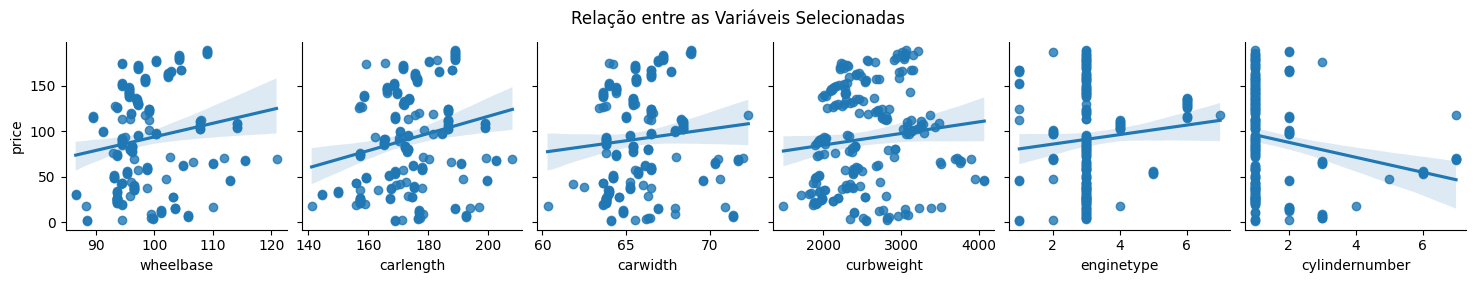

In [10]:
# Utilizando a função pairplot, é possível verificar a dipersão por cada variável em função do preço.
ax = sns.pairplot(db, y_vars='price', x_vars=['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginetype','cylindernumber'], kind= 'reg') # o comando kind = reg mostra a reta de regressão linear no caso.
ax.fig.suptitle('Relação entre as Variáveis Selecionadas', y=1.09)
ax


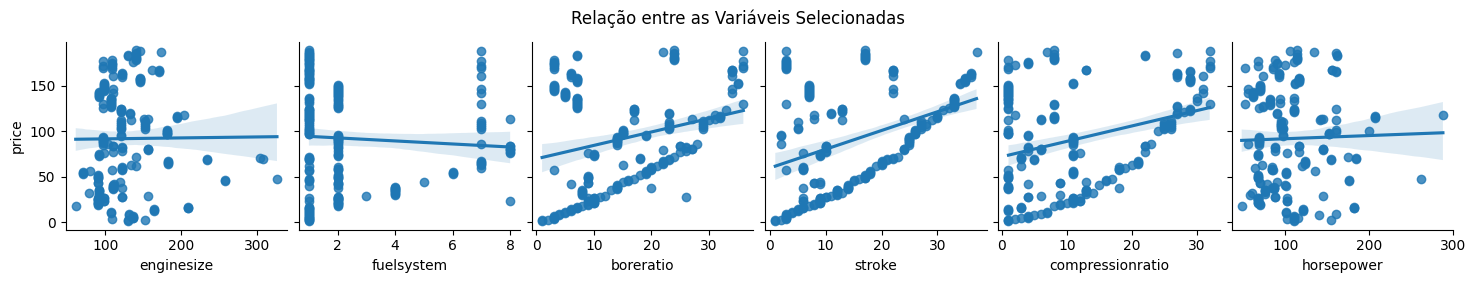

In [11]:
# Segue o mesmo para as demais variáveis
ax = sns.pairplot(db, y_vars='price', x_vars=['enginesize','fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower'], kind= 'reg') # o comando kind = reg mostra a reta de regressão linear no caso.
ax.fig.suptitle('Relação entre as Variáveis Selecionadas', y=1.09)
ax

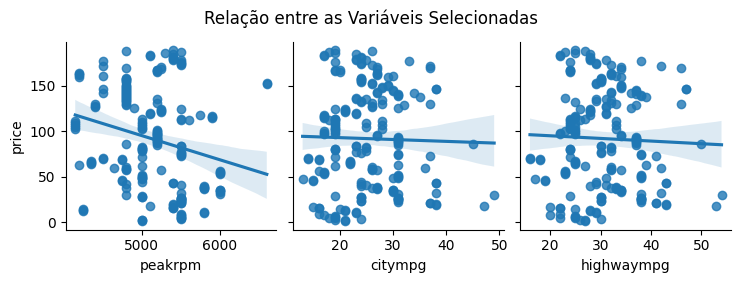

In [12]:
# Segue o mesmo.
ax = sns.pairplot(db, y_vars='price', x_vars=['peakrpm', 'citympg', 'highwaympg'], kind= 'reg') # o comando kind = reg mostra a reta de regressão linear no caso.
ax.fig.suptitle('Relação entre as Variáveis Selecionadas', y=1.09)
ax